In [1]:
# 导入一些包
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs #算法包

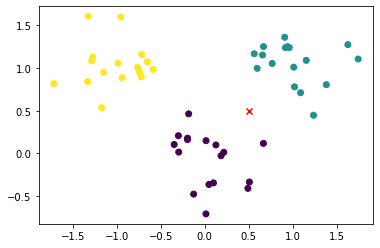

In [2]:
# 模拟出一些数据集出来

#r = np.random.randint(1,100)
r = 4
#print(r)
k = 3
x , y = make_blobs(n_samples = 50,
                   cluster_std = [0.3, 0.3, 0.3], #离散程度
                   centers = [[0,0],[1,1],[-1,1]]
                   ,random_state = r
                  )
sim_data = pd.DataFrame(x, columns = ['x', 'y'])
sim_data['label'] = y
sim_data.head(5)

datasets = sim_data.copy()

# 设置测试点

p = [0.5, 0.5]

plt.scatter(sim_data['x'], sim_data['y'], c = y)
plt.scatter(0.5, 0.5, c = 'red', marker = 'x')

In [8]:
# 计算每一个点到测试点的距离
X=datasets.iloc[:,:-1]
Y=datasets.iloc[:,-1]

In [16]:
# A方-B方,d & d方 同单调
np.power((X.iloc[0,:]-p),2).sum()

0.7232553409232777

In [20]:
d_sq=[]
for i in X.index:
    d_sq.append(np.power((X.iloc[i,:]-p),2).sum())

In [23]:
d_sq

[0.7232553409232777,
 1.6443865337582522,
 0.9485574934101488,
 0.2563701985334483,
 0.4509827655591647,
 1.4133483524117516,
 0.46650353591535915,
 0.35757179185096366,
 0.7583990347639499,
 0.3492306436143392,
 0.8657988706035901,
 1.846964965676515,
 1.9118636154045592,
 0.3759396213251619,
 0.3164384888224561,
 1.7346950128444336,
 0.7200573181325569,
 0.9080053520214452,
 3.313101192169204,
 1.342591132354027,
 0.870579168587593,
 0.7608529899604279,
 4.546655994102554,
 1.8684660344876882,
 0.7745800996790497,
 1.6523087395827014,
 0.44870826491503224,
 2.919568535592933,
 2.7884833260039086,
 0.5928614180810614,
 0.29899941998004564,
 0.8250761776510236,
 5.002427523263554,
 0.3918069990119927,
 2.215846287296894,
 0.5847429445022384,
 0.8730063237599242,
 0.6953546289328558,
 0.5443989645242653,
 2.516266622752993,
 0.8732737900208922,
 0.5222857188538921,
 0.597283723196553,
 3.534421369854603,
 3.4623909507849473,
 0.3776774036473332,
 1.9044169387397032,
 3.5215556736652127,

In [24]:
d__sq=np.power(X-p,2).sum(axis=1)
d__sq

0     0.723255
1     1.644387
2     0.948557
3     0.256370
4     0.450983
5     1.413348
6     0.466504
7     0.357572
8     0.758399
9     0.349231
10    0.865799
11    1.846965
12    1.911864
13    0.375940
14    0.316438
15    1.734695
16    0.720057
17    0.908005
18    3.313101
19    1.342591
20    0.870579
21    0.760853
22    4.546656
23    1.868466
24    0.774580
25    1.652309
26    0.448708
27    2.919569
28    2.788483
29    0.592861
30    0.298999
31    0.825076
32    5.002428
33    0.391807
34    2.215846
35    0.584743
36    0.873006
37    0.695355
38    0.544399
39    2.516267
40    0.873274
41    0.522286
42    0.597284
43    3.534421
44    3.462391
45    0.377677
46    1.904417
47    3.521556
48    1.693674
49    0.173595
dtype: float64

In [26]:
# 把计算出来的距离与标签拼接起来
df=pd.DataFrame({'dist':d__sq,'labor':y})
df

,dist,labor
0,0.723255,0
1,1.644387,2
2,0.948557,0
3,0.256370,1
4,0.450983,1
5,1.413348,2
6,0.466504,0
7,0.357572,0
8,0.758399,1
9,0.349231,1


In [31]:
# 确认前k个点

k=5
df_rank=df.sort_values(by='dist').iloc[:k,-1].mode().values[0]
df_rank



0

In [6]:
# 开始投票



In [32]:
# 封装成一个函数

def knn_classify(p, datasets, k):
    X = datasets.iloc[:,:-1]
    y = datasets.iloc[:, -1]
    d = np.power(X - p, 2).sum(axis = 1)
    df_dist = pd.DataFrame({'dist' : d, 'label' : y})
    predict = df_dist.sort_values(by = 'dist').iloc[:k, -1].mode().values[0]
    return predict

In [33]:
# 测试
knn_classify(p = [-1,1], datasets = datasets, k = 5)

2

In [9]:
# 尝试其它的数据集

rowdata={'电影名称':['无问西东','后来的我们','前任3','红海行动','唐人街探案','战狼2'],
         '打斗镜头':[1,5,12,108,112,115],
         '接吻镜头':[101,89,97,5,9,8],
         '电影类型':['爱情片','爱情片','爱情片','动作片','动作片','动作片']} 

movie_data=pd.DataFrame(rowdata)
movie_data

,电影名称,打斗镜头,接吻镜头,电影类型
0,无问西东,1,101,爱情片
1,后来的我们,5,89,爱情片
2,前任3,12,97,爱情片
3,红海行动,108,5,动作片
4,唐人街探案,112,9,动作片
5,战狼2,115,8,动作片


In [10]:
# datasets = movie_data.iloc[:, 1:]
# knn_classify([24,67], datasets, 5)

In [11]:
# sklearn 实现

X , y = make_blobs(n_samples = 50,
                   cluster_std = [0.3, 0.3, 0.3],
                   centers = [[0,0],[1,1],[-1,1]]
                   ,random_state = r
                  )

from sklearn.neighbors import KNeighborsClassifier


In [12]:
# breast_cancer 数据集

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 探索数据集
# data = load_breast_cancer()
# data

In [13]:
name = ['平均半径','平均纹理','平均周长','平均面积',
        '平均光滑度','平均紧凑度','平均凹度',
        '平均凹点','平均对称','平均分形维数',
        '半径误差','纹理误差','周长误差','面积误差',
        '平滑度误差','紧凑度误差','凹度误差',
        '凹点误差','对称误差',
        '分形维数误差','最差半径','最差纹理',
        '最差的边界','最差的区域','最差的平滑度',
        '最差的紧凑性','最差的凹陷','最差的凹点',
        '最差的对称性','最差的分形维数']

In [14]:
# 划分训练集和测试集


In [15]:
# 建立模型&评估模型


In [16]:
# 选取最优的K值

# 更换不同的n_neighbors参数的取值，观察结果的变化


In [17]:
# 绘制学习曲线

import matplotlib.pyplot as plt

score = []
krange = range(1,20)

In [18]:
# 交叉验证

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

score = []
krange = range(1,20)

In [19]:
from sklearn.model_selection import cross_val_score as CVS


In [20]:
# 均值：查看模型的平均效果


In [21]:
# 方差：查看模型是否稳定


12
0.9332401800962584


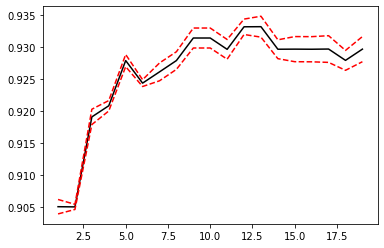

In [24]:
# 绘制带交叉验证的学习曲线
score = []
var_ = []
krange=range(1,20)

for i in krange:
    clf = KNeighborsClassifier(n_neighbors=i)
    cvresult = CVS(clf,x,y,cv=5)
    score.append(cvresult.mean())
    var_.append(cvresult.var())
    
plt.plot(krange,score,color='k')
plt.plot(krange,np.array(score)+np.array(var_)*2,c='red',linestyle='--')
plt.plot(krange,np.array(score)-np.array(var_)*2,c='red',linestyle='--')

bestindex = krange[score.index(max(score))]-1
print(bestindex)
print(score[bestindex])

In [22]:
# 归一化

from sklearn.preprocessing import MinMaxScaler 

data = [[-1,2],[-0.5,6],[0,10],[1,18]]

# 如果换成表是什么样子？
pd.DataFrame(data)

,0,1
0,-1.0,2
1,-0.5,6
2,0.0,10
3,1.0,18


In [23]:
# 实现归一化


In [24]:
# 训练和导出结果一步达成


In [25]:
# 也可以直接通过numpy来实现


5
0.9724367088607595


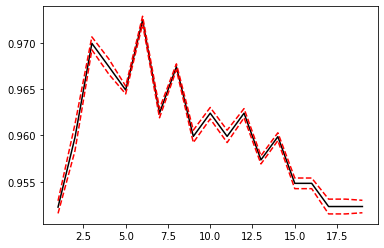

In [31]:
from sklearn.preprocessing import MinMaxScaler as mms
data = load_breast_cancer()
x = data.data
y = data.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

MMS = mms().fit(x_train)

x_test_ = MMS.transform(x_test)
x_train_ = MMS.transform(x_train)

score = []
var_ = []
krange = range(1,20)

# 严谨地使用了验证集
for i in krange:
    clf = KNeighborsClassifier(n_neighbors=i)
    cvresult = CVS(clf,x_train_,y_train,cv=5)
    score.append(cvresult.mean())
    var_.append(cvresult.var())
plt.plot(krange,score,color = 'k')
plt.plot(krange,np.array(score)+np.array(var_)*2,c='red',linestyle='--')
plt.plot(krange,np.array(score)-np.array(var_)*2,c='red',linestyle='--')
bestindex = krange[score.index(max(score))]-1
print(bestindex)
print(score[bestindex])

In [32]:
# 测试模型结果
clf = KNeighborsClassifier(n_neighbors=8).fit(x_train_,y_train)
score = clf.score(x_test_,y_test)
score

0.9707602339181286

2
0.9699367088607594


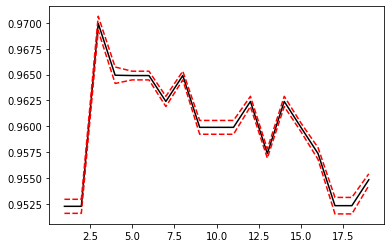

In [33]:
# 加上参数weights

score = []
var_ = []
krange = range(1,20)

for i in krange:
    clf = KNeighborsClassifier(n_neighbors=i,weights='distance')
    cvresult = CVS(clf,x_train_,y_train,cv=5)
    score.append(cvresult.mean())
    var_.append(cvresult.var())

plt.plot(krange,score,color='k')
plt.plot(krange,np.array(score)+np.array(var_)*2,c='red',linestyle='--')
plt.plot(krange,np.array(score)-np.array(var_)*2,c='red',linestyle='--')
bestindex = krange[score.index(max(score))]-1
print(bestindex)
print(score[bestindex])

In [34]:
# 测试模型效果
clf = KNeighborsClassifier(n_neighbors=8,weights='distance').fit(x_train_,y_train)
score =clf.score(x_test_,y_test)
score

0.9649122807017544